In [1]:
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [2]:
state1_0 = np.zeros((99833, 1))
state2_0 = np.zeros((99765, 1))
state3_0 = np.zeros((99645, 1))
state4_0 = np.zeros((99784, 1))
state5_0 = np.zeros((99665, 1))
state6_0 = np.zeros((99555, 1))
state7_0 = np.zeros((99495, 1))
state8_0 = np.zeros((99458, 1))
state9_0 = np.zeros((99254, 1))
state10_0 = np.zeros((98666, 1))

In [3]:
state1_1 = np.ones((167, 1))
state2_1 = np.ones((235, 1))
state3_1 = np.ones((355, 1))
state4_1 = np.ones((216, 1))
state5_1 = np.ones((335, 1))
state6_1 = np.ones((445, 1))
state7_1 = np.ones((505, 1))
state8_1 = np.ones((542, 1))
state9_1 = np.ones((746, 1))
state10_1 = np.ones((1334, 1))

In [4]:
state1 = np.concatenate([state1_0, state1_1], axis=0)
state2 = np.concatenate([state2_0, state2_1], axis=0)
state3 = np.concatenate([state3_0, state3_1], axis=0)
state4 = np.concatenate([state4_0, state4_1], axis=0)
state5 = np.concatenate([state5_0, state5_1], axis=0)
state6 = np.concatenate([state6_0, state6_1], axis=0)
state7 = np.concatenate([state7_0, state7_1], axis=0)
state8 = np.concatenate([state8_0, state8_1], axis=0)
state9 = np.concatenate([state9_0, state9_1], axis=0)
state10 = np.concatenate([state10_0, state10_1], axis=0)

In [5]:
state1 = pd.DataFrame(state1)
state2 = pd.DataFrame(state2)
state3 = pd.DataFrame(state3)
state4 = pd.DataFrame(state4)
state5 = pd.DataFrame(state5)
state6 = pd.DataFrame(state6)
state7 = pd.DataFrame(state7)
state8 = pd.DataFrame(state8)
state9 = pd.DataFrame(state9)
state10 = pd.DataFrame(state10)

In [6]:
state1 = state1.sample(frac=1).reset_index(drop=True)
state2 = state2.sample(frac=1).reset_index(drop=True)
state3 = state3.sample(frac=1).reset_index(drop=True)
state4 = state4.sample(frac=1).reset_index(drop=True)
state5 = state5.sample(frac=1).reset_index(drop=True)
state6 = state6.sample(frac=1).reset_index(drop=True)
state7 = state7.sample(frac=1).reset_index(drop=True)
state8 = state8.sample(frac=1).reset_index(drop=True)
state9 = state9.sample(frac=1).reset_index(drop=True)
state10 = state10.sample(frac=1).reset_index(drop=True)

In [7]:
df = pd.concat([state1, state2, state3, state4, state5, state6, state7, state8, state9, state10], axis=1)

In [8]:
df.columns = ['state1', 'state2', 'state3', 'state4', 'state5', 'state6', 'state7', 'state8', 'state9', 'state10']
df

,state1,state2,state3,state4,state5,state6,state7,state8,state9,state10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
thetas = np.zeros(10)
a = np.ones(10)
b = np.ones(10)

In [10]:
suicide_rate = list(df.mean())
suicide_rate

[0.00167,
 0.00235,
 0.00355,
 0.00216,
 0.00335,
 0.00445,
 0.00505,
 0.00542,
 0.00746,
 0.01334]

In [11]:
check = [9999, 49999, 99999]
check_a = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
check_b = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

In [12]:
total_regret = 0
total_regret_history = []

In [13]:
for i in range(len(df)):
    for k in range(10):
        thetas[k] = np.random.beta(a[k] , b[k])
    slcted = np.argmax(thetas)
    
    if df.iloc[i, slcted] == 1:
        suicide = 1
    else:
        suicide = 0
        
    a[slcted] = a[slcted] + suicide
    b[slcted] = b[slcted] + (1 - suicide)
    
    regret = max(suicide_rate) - suicide_rate[slcted]
    total_regret = total_regret + regret
    total_regret_history.append(total_regret)
    
    if i in check:
        for k in range(10):
            check_a[k].append(a[k])
            check_b[k].append(b[k])

In [14]:
_check = [0]
for i in range(len(check)):
    _check.append(check[i])
check = _check

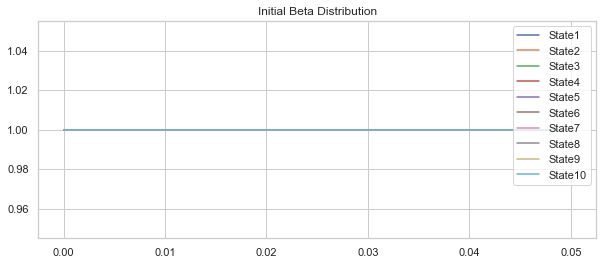

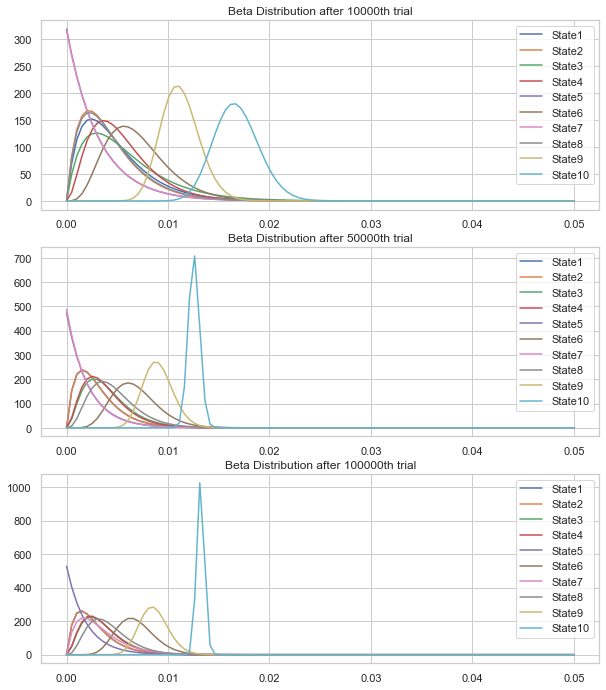

In [15]:
plt.figure(figsize = (10, 4))
x = np.linspace(0, 0.05, 100)
for k in range(10):
    fx = beta.pdf(x , check_a[k][0] , check_b[k][0])
    plt.plot(x, fx, label = "State{}".format(k+1))
plt.legend()
plt.title("Initial Beta Distribution")
plt.show()
plt.figure(figsize = (10, 16))
for c in range(1, len(check)):
    subplot = plt.subplot(len(check) , 1 , c+1)
    for k in range(10):
        fx = beta.pdf(x, check_a[k][c] , check_b[k][c])
        plt.plot(x, fx , label = "State{}".format(k+1))
    plt.title("Beta Distribution after {}th trial".format(check[c]+1))
    plt.legend()
plt.show()

In [16]:
suicide_rate

[0.00167,
 0.00235,
 0.00355,
 0.00216,
 0.00335,
 0.00445,
 0.00505,
 0.00542,
 0.00746,
 0.01334]

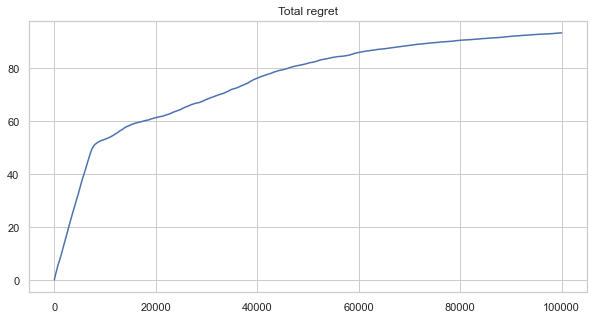

In [17]:
plt.figure(figsize = (10, 5))
plt.plot(total_regret_history)
plt.title("Total regret")
plt.show()

In [18]:
thetas = np.zeros(10)
a = np.ones(10)
b = np.ones(10)

In [19]:
check = [9999, 49999, 99999]
check_a = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
check_b = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

In [20]:
for i in range(len(df)):
    for k in range(9):
        thetas[k] = np.random.beta(a[k] , b[k])
    slcted = np.argmax(thetas)
    
    if df.iloc[i, slcted] == 1:
        suicide = 1
    else:
        suicide = 0
        
    a[slcted] = a[slcted] + suicide
    b[slcted] = b[slcted] + (1 - suicide)
    
    if i in check:
        for k in range(9):
            check_a[k].append(a[k])
            check_b[k].append(b[k])

In [21]:
_check = [0]
for i in range(len(check)):
    _check.append(check[i])
check = _check

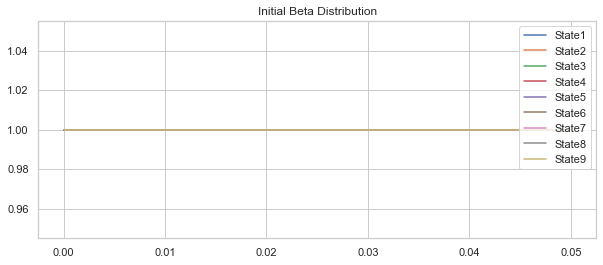

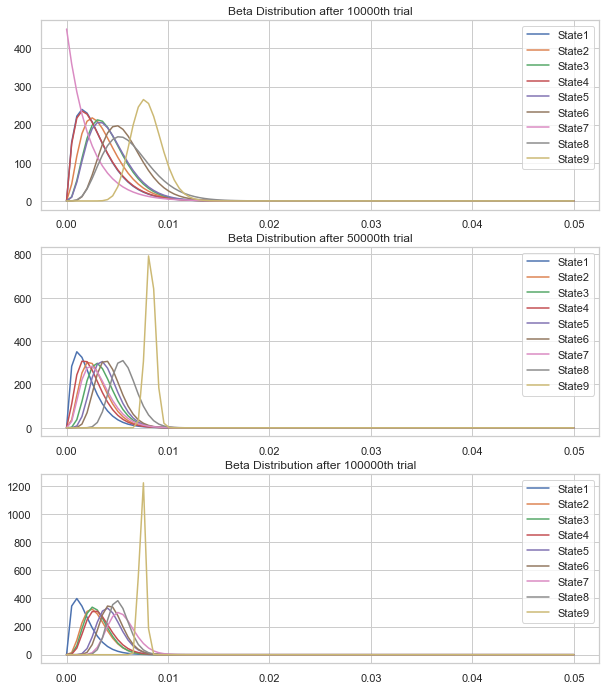

In [22]:
plt.figure(figsize = (10, 4))
x = np.linspace(0, 0.05, 100)
for k in range(9):
    fx = beta.pdf(x , check_a[k][0] , check_b[k][0])
    plt.plot(x, fx, label = "State{}".format(k+1))
plt.legend()
plt.title("Initial Beta Distribution")
plt.show()
plt.figure(figsize = (10, 16))
for c in range(1, len(check)):
    subplot = plt.subplot(len(check) , 1 , c+1)
    for k in range(9):
        fx = beta.pdf(x, check_a[k][c] , check_b[k][c])
        plt.plot(x, fx , label = "State{}".format(k+1))
    plt.title("Beta Distribution after {}th trial".format(check[c]+1))
    plt.legend()
plt.show()

In [23]:
thetas = np.zeros(10)
a = np.ones(10)
b = np.ones(10)

In [24]:
check = [9999, 49999, 99999]
check_a = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
check_b = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

In [25]:
for i in range(len(df)):
    for k in range(8):
        thetas[k] = np.random.beta(a[k] , b[k])
    slcted = np.argmax(thetas)
    
    if df.iloc[i, slcted] == 1:
        suicide = 1
    else:
        suicide = 0
        
    a[slcted] = a[slcted] + suicide
    b[slcted] = b[slcted] + (1 - suicide)
    
    if i in check:
        for k in range(8):
            check_a[k].append(a[k])
            check_b[k].append(b[k])

In [26]:
_check = [0]
for i in range(len(check)):
    _check.append(check[i])
check = _check

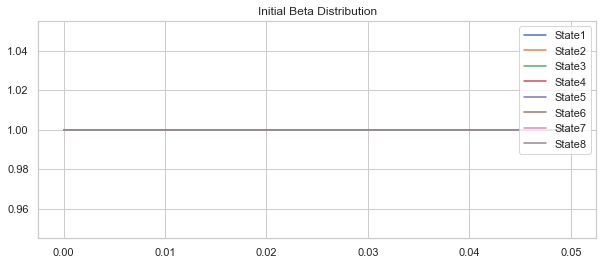

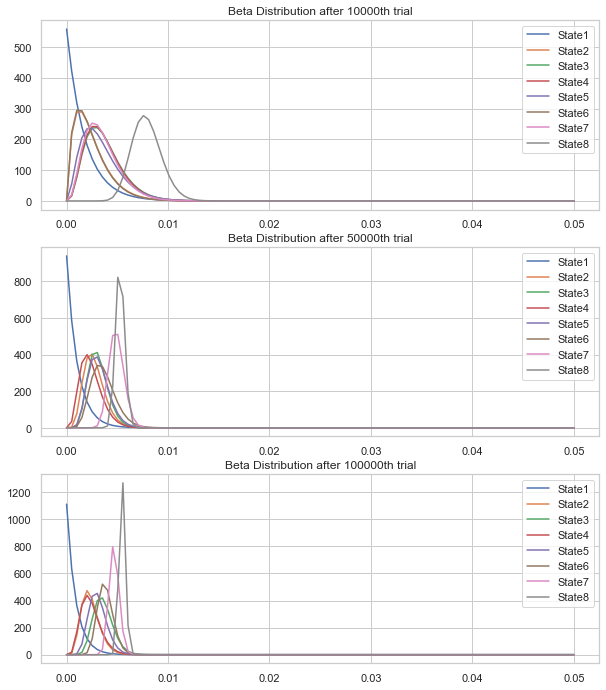

In [27]:
plt.figure(figsize = (10, 4))
x = np.linspace(0, 0.05, 100)
for k in range(8):
    fx = beta.pdf(x , check_a[k][0] , check_b[k][0])
    plt.plot(x, fx, label = "State{}".format(k+1))
plt.legend()
plt.title("Initial Beta Distribution")
plt.show()
plt.figure(figsize = (10, 16))
for c in range(1, len(check)):
    subplot = plt.subplot(len(check) , 1 , c+1)
    for k in range(8):
        fx = beta.pdf(x, check_a[k][c] , check_b[k][c])
        plt.plot(x, fx , label = "State{}".format(k+1))
    plt.title("Beta Distribution after {}th trial".format(check[c]+1))
    plt.legend()
plt.show()